In [94]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /Users/jackiewang/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import os

# List files in the downloaded directory
print("Files in directory:", os.listdir(path))

# Load the CSV file (adjust filename if different)
csv_file = os.path.join(path, '2022', 'heart_2022_no_nans.csv')
df = pd.read_csv(csv_file)

# Check the shape
print("Dataset shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Files in directory: ['2022', '2020']
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40


In [96]:
# Check class distribution of HadHeartAttack
print("=== Class Distribution of 'HadHeartAttack' ===\n")
print("Counts:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentages:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)
print(f"\nTotal samples: {len(df):,}")
print(f"Class imbalance ratio: {df['HadHeartAttack'].value_counts()['No'] / df['HadHeartAttack'].value_counts()['Yes']:.2f}:1")

=== Class Distribution of 'HadHeartAttack' ===

Counts:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentages:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64

Total samples: 246,022
Class imbalance ratio: 17.31:1


In [97]:
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [98]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

EDA: Exploratory Data Analysis

In [99]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


PhysicalHealth - how many days in a month did you feel poor physical health.

MentalHealth - how many days in a month did you feel poor mental health.


## Research Question EDA

Question 1 (Hypothesis Driven): Do individuals with diabetes, stroke history, or poor general health have higher odds of having had a heart attack, after accounting for basic demographic factors?

Question 2 (Data Driven): Can we accurately predict whether an individual has had a heart attack based on lifestyle behaviors and existing chronic health conditions?


Heart Attack Distribution:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentage distribution:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64


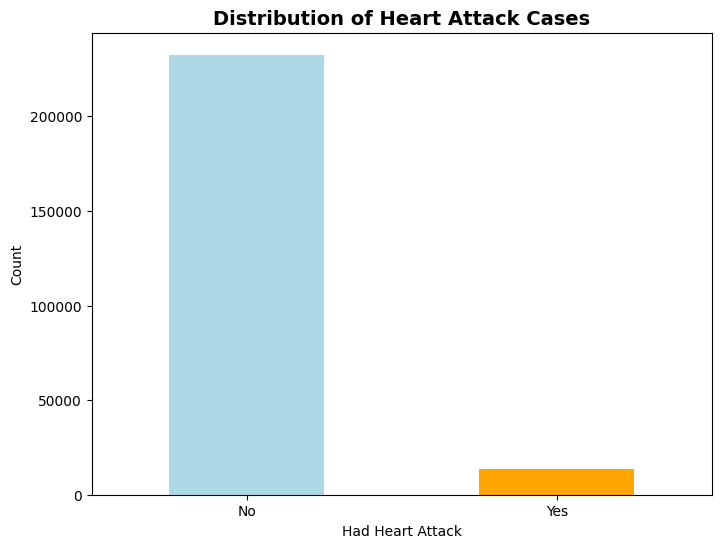

In [100]:
print("Heart Attack Distribution:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentage distribution:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)

# Create a more readable plot
plt.figure(figsize=(8, 6))
df['HadHeartAttack'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Distribution of Heart Attack Cases', fontsize=14, fontweight='bold')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [101]:
# Diabetes, Stroke, General Health vs Heart Attack
key_vars_q1 = ['HadDiabetes', 'HadStroke', 'GeneralHealth', 'AgeCategory', 'Sex', 'BMI']

print("\n1. Diabetes vs Heart Attack:")
crosstab_diabetes = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_diabetes)

print("\n2. Stroke vs Heart Attack:")
crosstab_stroke = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_stroke)

print("\n3. General Health vs Heart Attack:")
crosstab_health = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_health)


1. Diabetes vs Heart Attack:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

2. Stroke vs Heart Attack:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

3. General Health vs Heart Attack:
HadHeartAttack         No        Yes
GeneralHealth                       
Excellent       98.569536   1.430464
Fair            87.775205  12.224795
Good            94.058830   5.941170
Poor            78.536585  21.463415
Very good       97.160887   2.839113
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             

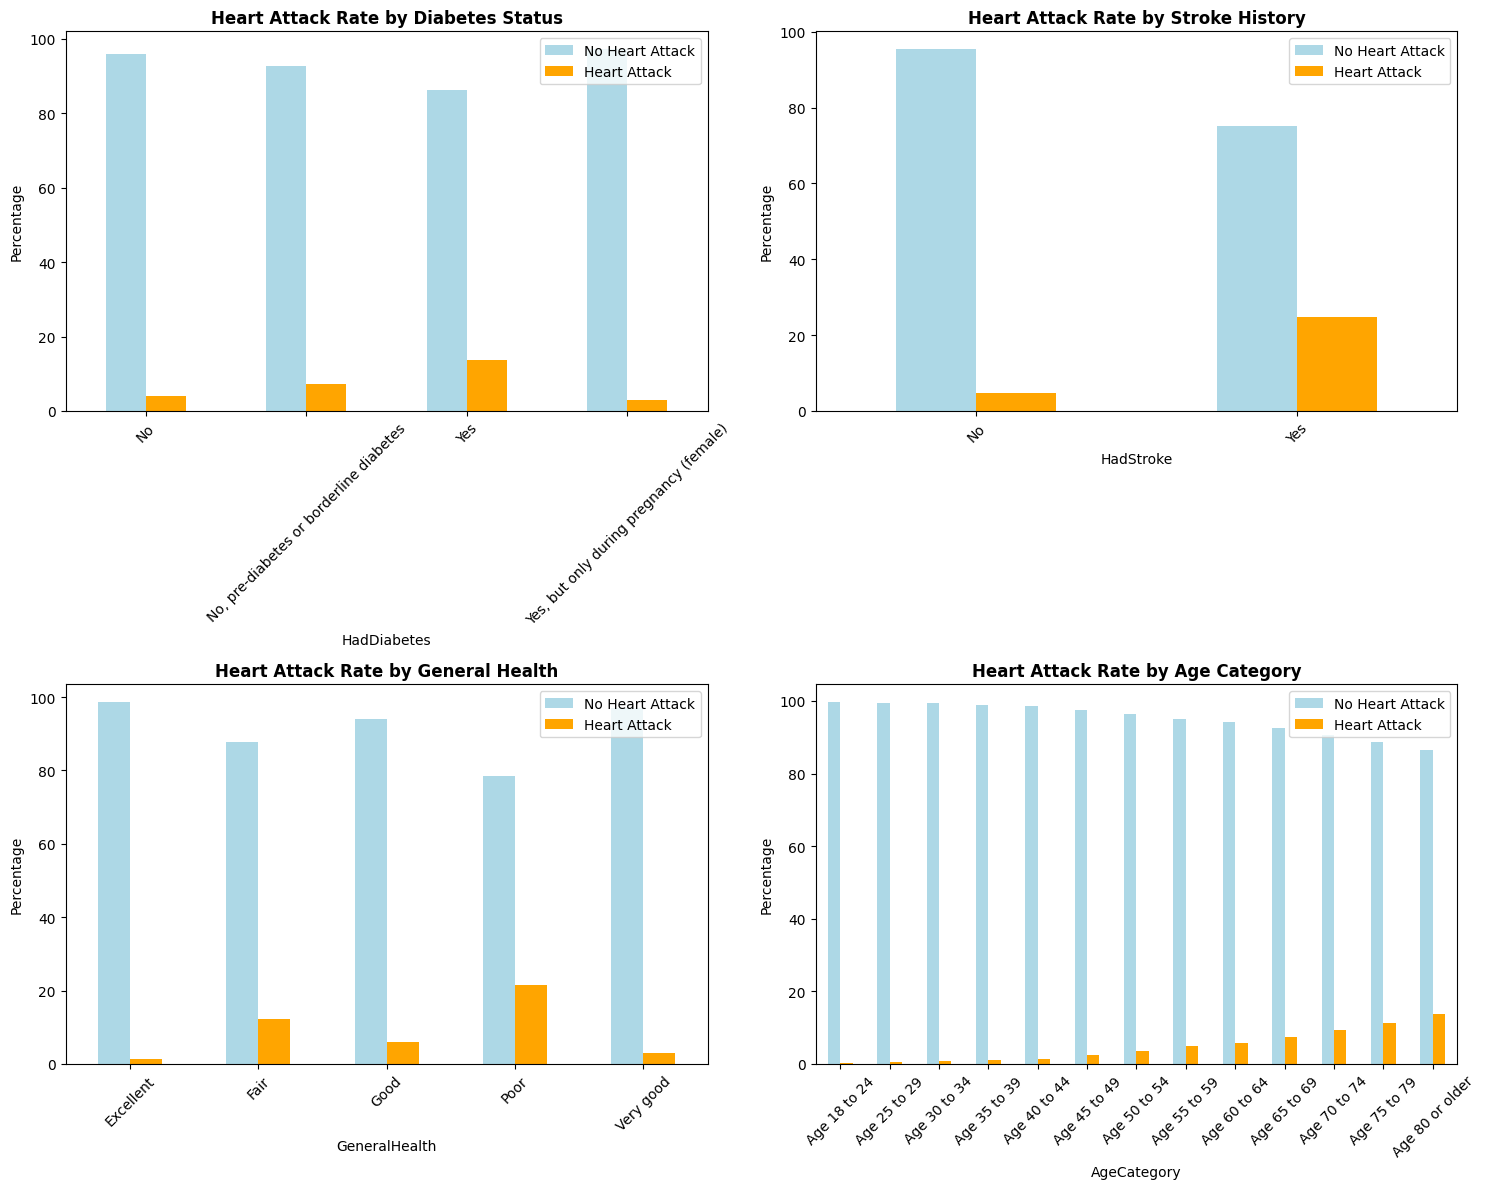

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Diabetes vs Heart Attack
ax1 = axes[0, 0]
diabetes_ha = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
diabetes_ha.plot(kind='bar', ax=ax1, color=['lightblue', 'orange'])
ax1.set_title('Heart Attack Rate by Diabetes Status', fontweight='bold')
ax1.set_ylabel('Percentage')
ax1.legend(['No Heart Attack', 'Heart Attack'])
ax1.tick_params(axis='x', rotation=45)

# Stroke vs Heart Attack
ax2 = axes[0, 1]
stroke_ha = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
stroke_ha.plot(kind='bar', ax=ax2, color=['lightblue', 'orange'])
ax2.set_title('Heart Attack Rate by Stroke History', fontweight='bold')
ax2.set_ylabel('Percentage')
ax2.legend(['No Heart Attack', 'Heart Attack'])
ax2.tick_params(axis='x', rotation=45)

# General Health vs Heart Attack
ax3 = axes[1, 0]
health_ha = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
health_ha.plot(kind='bar', ax=ax3, color=['lightblue', 'orange'])
ax3.set_title('Heart Attack Rate by General Health', fontweight='bold')
ax3.set_ylabel('Percentage')
ax3.legend(['No Heart Attack', 'Heart Attack'])
ax3.tick_params(axis='x', rotation=45)

# Age vs Heart Attack
ax4 = axes[1, 1]
age_ha = pd.crosstab(df['AgeCategory'], df['HadHeartAttack'], normalize='index') * 100
age_ha.plot(kind='bar', ax=ax4, color=['lightblue', 'orange'])
ax4.set_title('Heart Attack Rate by Age Category', fontweight='bold')
ax4.set_ylabel('Percentage')
ax4.legend(['No Heart Attack', 'Heart Attack'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 2 EDA: Lifestyle Behaviors and Chronic Conditions

In [103]:
# Lifestyle behaviors and chronic conditions analysis
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours']
chronic_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadKidneyDisease', 
                     'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis']

# Smoking status
print("\n1. Smoking Status vs Heart Attack:")
smoking_ha = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'], normalize='index') * 100
print(smoking_ha)

# Alcohol consumption
print("\n2. Alcohol Consumption vs Heart Attack:")
alcohol_ha = pd.crosstab(df['AlcoholDrinkers'], df['HadHeartAttack'], normalize='index') * 100
print(alcohol_ha)

# Physical activity
print("\n3. Physical Activity vs Heart Attack:")
activity_ha = pd.crosstab(df['PhysicalActivities'], df['HadHeartAttack'], normalize='index') * 100
print(activity_ha)


1. Smoking Status vs Heart Attack:
HadHeartAttack                                No       Yes
SmokerStatus                                              
Current smoker - now smokes every day  91.684750  8.315250
Current smoker - now smokes some days  93.171997  6.828003
Former smoker                          91.813446  8.186554
Never smoked                           96.296798  3.703202

2. Alcohol Consumption vs Heart Attack:
HadHeartAttack          No       Yes
AlcoholDrinkers                     
No               92.675789  7.324211
Yes              96.063766  3.936234

3. Physical Activity vs Heart Attack:
HadHeartAttack             No       Yes
PhysicalActivities                     
No                  91.004314  8.995686
Yes                 95.549818  4.450182


In [104]:
# Chronic conditions analysis
print("\nChronic Conditions vs Heart Attack:")
chronic_results = {}

for condition in chronic_conditions:
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        if 'Yes' in condition_ha.index:
            heart_attack_rate = condition_ha.loc['Yes', 'Yes'] if 'Yes' in condition_ha.columns else 0
            chronic_results[condition] = heart_attack_rate
            print(f"\n{condition}:")
            print(condition_ha)

# Summary of heart attack rates by chronic condition
chronic_summary = pd.DataFrame(list(chronic_results.items()), 
                             columns=['Condition', 'Heart_Attack_Rate_%'])
chronic_summary = chronic_summary.sort_values('Heart_Attack_Rate_%', ascending=False)
print(chronic_summary)


Chronic Conditions vs Heart Attack:

HadDiabetes:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

HadStroke:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

HadAsthma:
HadHeartAttack         No       Yes
HadAsthma                          
No              94.764503  5.235497
Yes             93.246462  6.753538

HadKidneyDisease:
HadHeartAttack           No        Yes
HadKidneyDisease                      
No                95.083881   4.916119
Yes               83.206310  16.793690

HadSkinCancer:
HadHeartAttack         No       Yes
HadSkinCancer                     

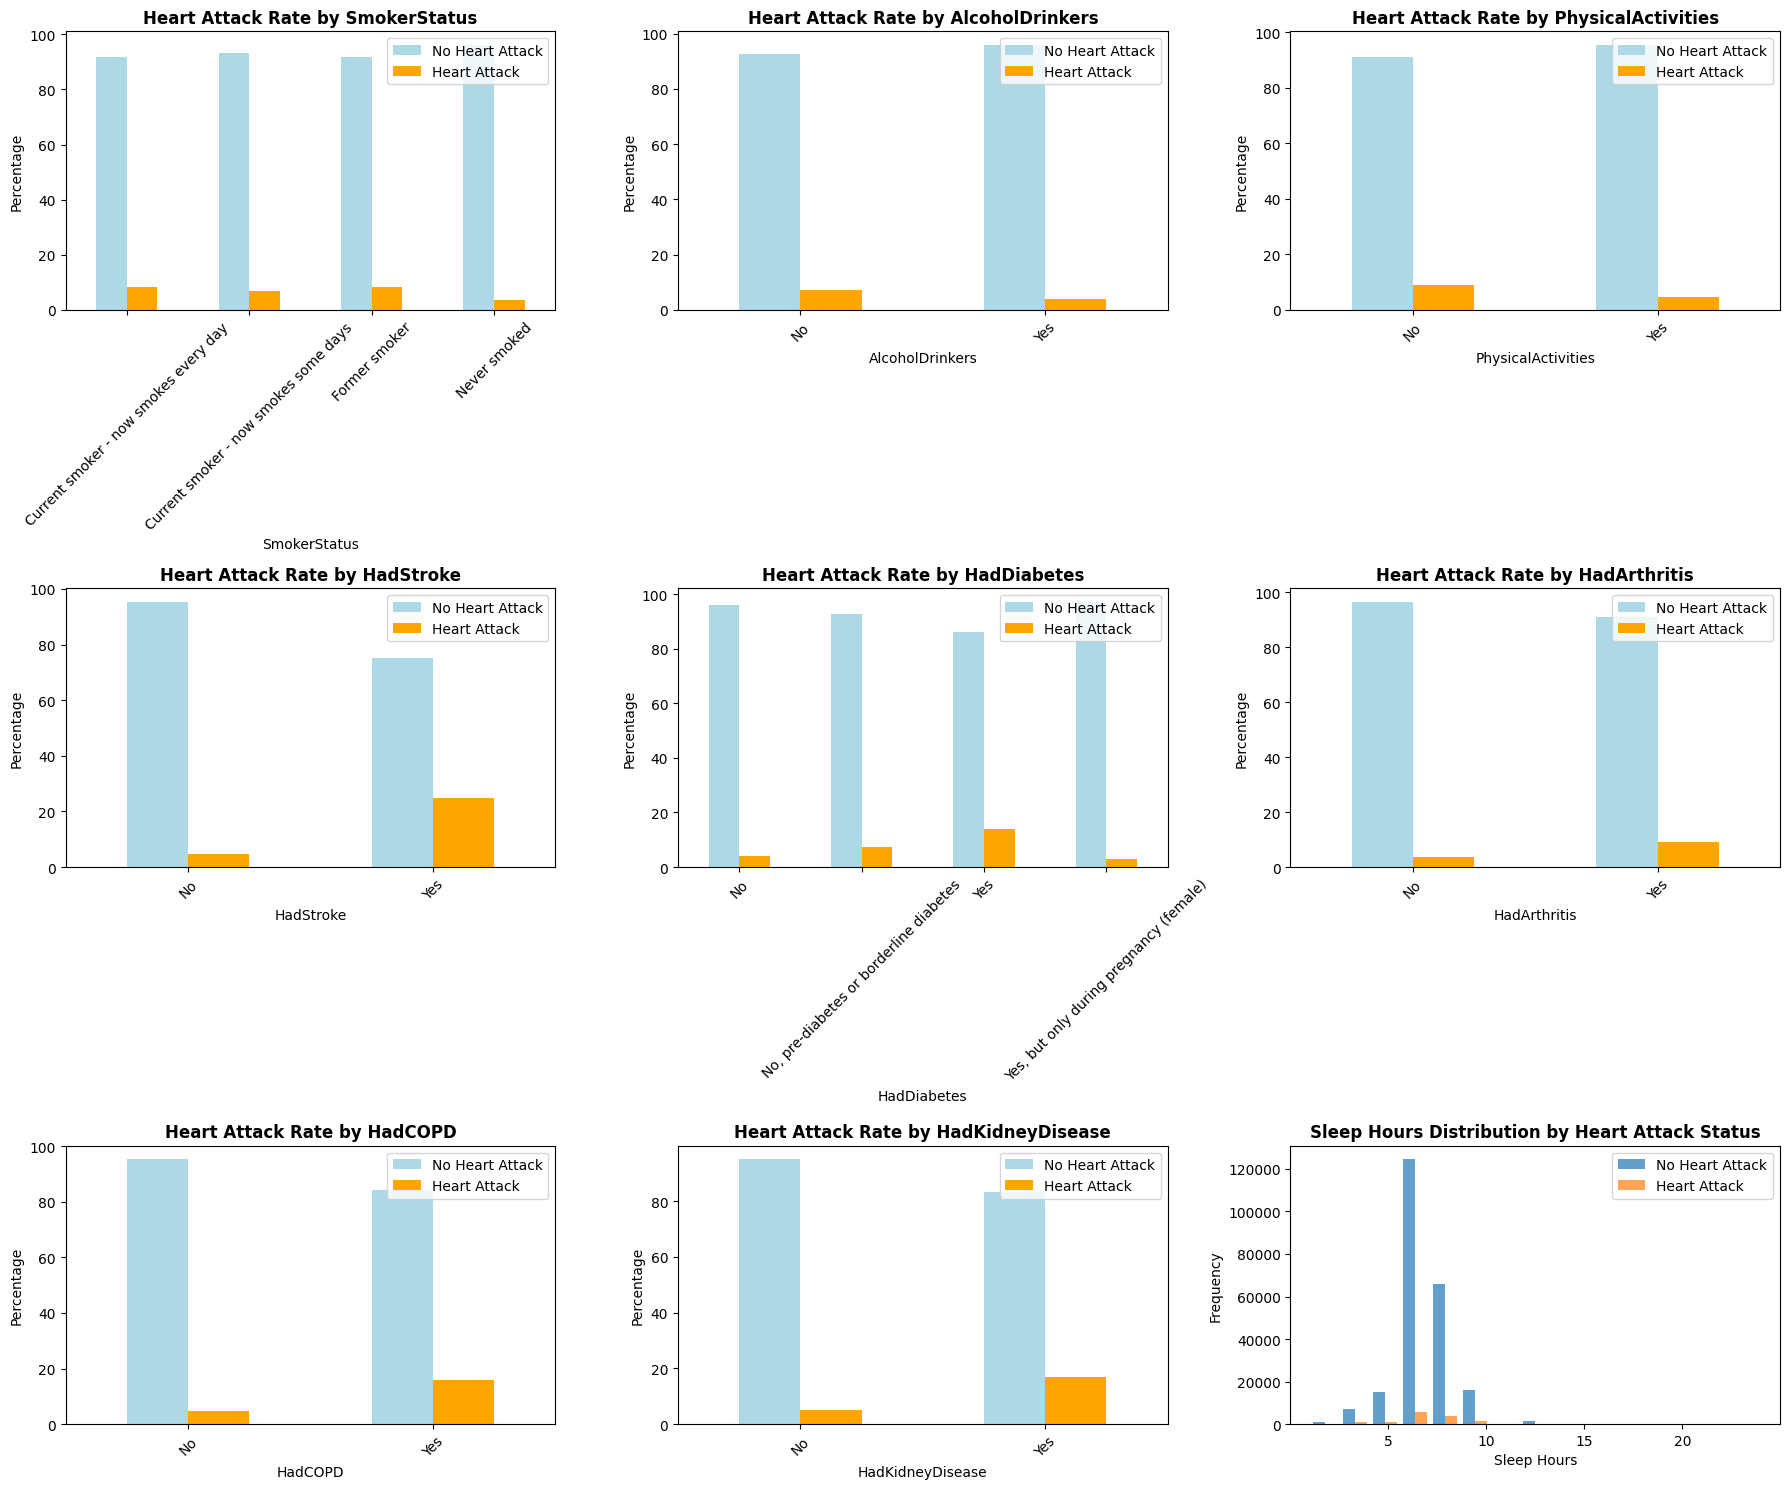

In [105]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Lifestyle variables
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, var in enumerate(lifestyle_vars):
    var_ha = pd.crosstab(df[var], df['HadHeartAttack'], normalize='index') * 100
    var_ha.plot(kind='bar', ax=axes[i], color=['lightblue', 'orange'])
    axes[i].set_title(f'Heart Attack Rate by {var}', fontweight='bold')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Heart Attack', 'Heart Attack'])
    axes[i].tick_params(axis='x', rotation=45)

# Top chronic conditions
top_chronic = ['HadStroke', 'HadDiabetes', 'HadArthritis', 'HadCOPD', 'HadKidneyDisease']
for i, condition in enumerate(top_chronic):
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        condition_ha.plot(kind='bar', ax=axes[i+3], color=['lightblue', 'orange'])
        axes[i+3].set_title(f'Heart Attack Rate by {condition}', fontweight='bold')
        axes[i+3].set_ylabel('Percentage')
        axes[i+3].legend(['No Heart Attack', 'Heart Attack'])
        axes[i+3].tick_params(axis='x', rotation=45)

# Sleep hours analysis
axes[8].hist([df[df['HadHeartAttack']=='No']['SleepHours'], 
              df[df['HadHeartAttack']=='Yes']['SleepHours']], 
             alpha=0.7, label=['No Heart Attack', 'Heart Attack'], bins=15)
axes[8].set_title('Sleep Hours Distribution by Heart Attack Status', fontweight='bold')
axes[8].set_xlabel('Sleep Hours')
axes[8].set_ylabel('Frequency')
axes[8].legend()

plt.tight_layout()
plt.show()

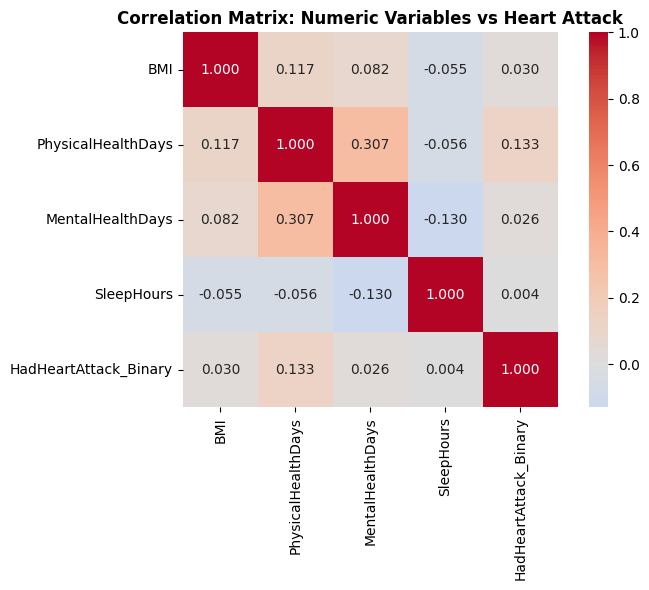

Correlation with Heart Attack:
PhysicalHealthDays    0.133420
BMI                   0.030413
MentalHealthDays      0.025892
SleepHours            0.003631
Name: HadHeartAttack_Binary, dtype: float64


In [106]:
# Correlation analysis for numeric variables
numeric_for_corr = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Create binary version of heart attack for correlation
df_corr = df.copy()
df_corr['HadHeartAttack_Binary'] = (df_corr['HadHeartAttack'] == 'Yes').astype(int)

# Correlation matrix
corr_matrix = df_corr[numeric_for_corr + ['HadHeartAttack_Binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix: Numeric Variables vs Heart Attack', fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation with Heart Attack:")
correlations = corr_matrix['HadHeartAttack_Binary'].drop('HadHeartAttack_Binary').sort_values(key=abs, ascending=False)
print(correlations)

## Step 2: Encode & Prepare Data

Prepare the data for modeling by encoding categorical variables.

In [107]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Create df_model as a copy of the dataframe
df_model = df.copy()

# Step 2: Convert 'HadHeartAttack' to binary (1 for 'Yes', 0 for 'No')
df_model['HadHeartAttack'] = (df_model['HadHeartAttack'] == 'Yes').astype(int)

print("Target variable converted to binary:")
print(df_model['HadHeartAttack'].value_counts())
print(f"\nClass distribution: {df_model['HadHeartAttack'].value_counts(normalize=True) * 100}")

# Step 3: Identify categorical columns (excluding the already-encoded target)
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

print(f"\nCategorical columns to encode: {len(categorical_cols)}")
print(categorical_cols)

# Step 4: Encode all categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"Encoded: {col} - {len(le.classes_)} unique values")

print(f"\n✓ Data preparation complete!")
print(f"Shape: {df_model.shape}")
print(f"All columns are now numeric: {df_model.select_dtypes(include=['object']).shape[1] == 0}")

Target variable converted to binary:
HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

Class distribution: HadHeartAttack
0    94.539106
1     5.460894
Name: proportion, dtype: float64

Categorical columns to encode: 33
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Encoded: State - 54 unique values
Encoded: Sex - 2 unique values
Encoded: GeneralHealth - 5 unique values
Encoded: LastCheckupTime - 4 unique values
Encoded: PhysicalActivitie

In [108]:
# Verify the encoding
print("=== Verification ===")
print(f"\nDataframe info:")
print(df_model.info())

print(f"\nFirst few rows of encoded data:")
print(df_model.head())

print(f"\nTarget variable 'HadHeartAttack':")
print(f"  Data type: {df_model['HadHeartAttack'].dtype}")
print(f"  Unique values: {df_model['HadHeartAttack'].unique()}")
print(f"  Value counts:\n{df_model['HadHeartAttack'].value_counts()}")

=== Verification ===

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  int64  
 1   Sex                        246022 non-null  int64  
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  int64  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int64  
 9   HadHeartAttack             246022 non-null  int64  
 10  HadAngina                  246022 non-null  int64  
 11  HadStroke                  246022 non-null  int64  
 12  HadAsthma                  246022 non-null  int6

In [109]:
## Step 3: Train/Test Split & Correlation Analysis

## Split the data and analyze correlations to identify the most important features.

In [110]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df_model.drop('HadHeartAttack', axis=1)
y = df_model['HadHeartAttack']

print("Features and target separated:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Step 2: Create train/test split (80/20, stratified, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTrain/Test Split Complete:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

print(f"\nClass distribution in train set:")
print(y_train.value_counts(normalize=True) * 100)
print(f"\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

Features and target separated:
X shape: (246022, 39)
y shape: (246022,)

Train/Test Split Complete:
X_train shape: (196817, 39)
X_test shape:  (49205, 39)
y_train shape: (196817,)
y_test shape:  (49205,)

Class distribution in train set:
HadHeartAttack
0    94.53909
1     5.46091
Name: proportion, dtype: float64

Class distribution in test set:
HadHeartAttack
0    94.539173
1     5.460827
Name: proportion, dtype: float64


In [111]:
# Step 3: Calculate correlations on TRAINING SET ONLY (to avoid data leakage)
# Combine X_train and y_train for correlation analysis
train_data = X_train.copy()
train_data['HadHeartAttack'] = y_train

# Calculate correlations with the target variable
corrs = train_data.corr()['HadHeartAttack'].drop('HadHeartAttack').sort_values(key=abs, ascending=False)

# Step 4: Display top 15 features by absolute correlation value
print("=== TOP 15 FEATURES BY CORRELATION (Training Set) ===\n")
top15_corrs = corrs.head(15)

for i, (feature, corr_val) in enumerate(top15_corrs.items(), 1):
    print(f"{i:2d}. {feature[:45]:45} correlation = {corr_val:7.4f}")

print(f"\n\nTop 15 correlations:")
print(top15_corrs)

=== TOP 15 FEATURES BY CORRELATION (Training Set) ===

 1. HadAngina                                     correlation =  0.4472
 2. HadStroke                                     correlation =  0.1793
 3. AgeCategory                                   correlation =  0.1724
 4. ChestScan                                     correlation =  0.1662
 5. DifficultyWalking                             correlation =  0.1595
 6. HadDiabetes                                   correlation =  0.1365
 7. HadCOPD                                       correlation =  0.1338
 8. PhysicalHealthDays                            correlation =  0.1327
 9. PneumoVaxEver                                 correlation =  0.1204
10. HadArthritis                                  correlation =  0.1165
11. HadKidneyDisease                              correlation =  0.1093
12. DeafOrHardOfHearing                           correlation =  0.0975
13. DifficultyErrands                             correlation =  0.0912
14. Diffi

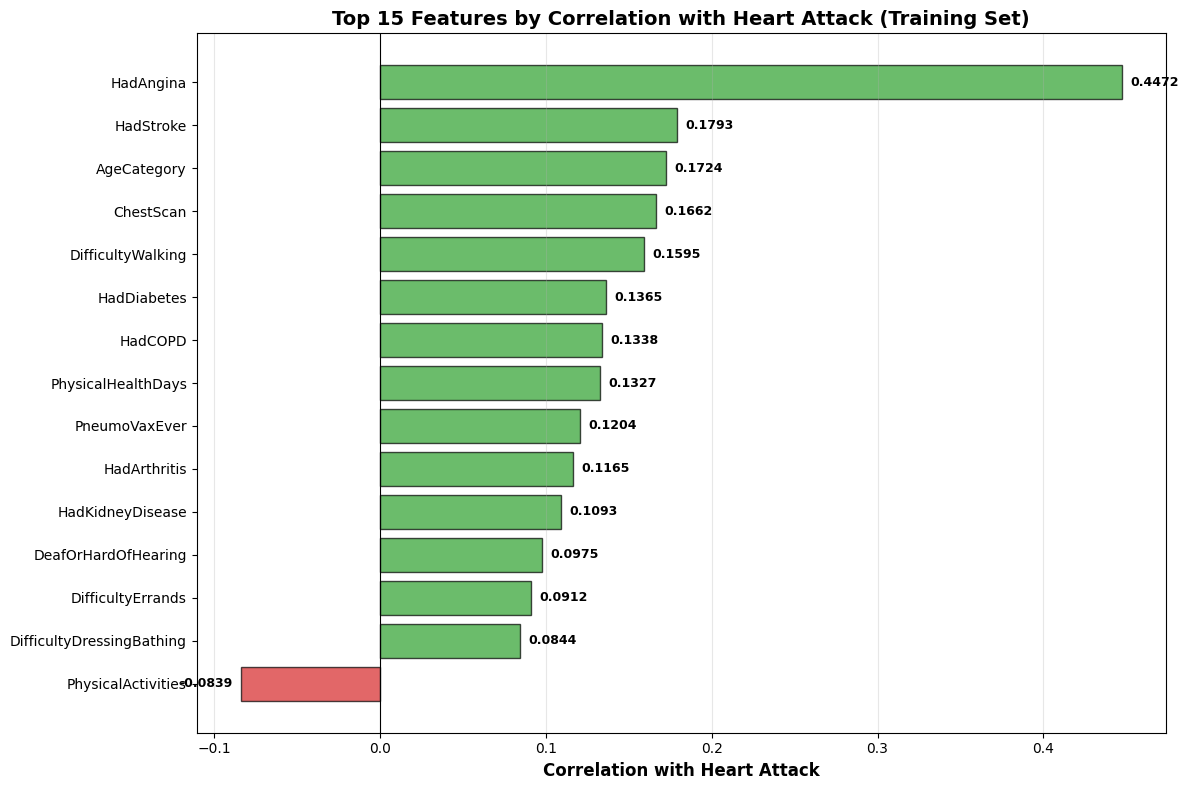


✓ Correlation analysis complete - using TRAINING SET ONLY to avoid data leakage!


In [112]:
# Step 5: Create a bar plot showing top 15 correlations
fig, ax = plt.subplots(figsize=(12, 8))

# Get top 15 correlations
top15_features = top15_corrs.head(15)
features = top15_features.index
values = top15_features.values

# Create bar plot with colors based on positive/negative correlation
colors_bar = ['#d62728' if v < 0 else '#2ca02c' for v in values]
bars = ax.barh(range(len(features)), values, color=colors_bar, alpha=0.7, edgecolor='black')

# Customize plot
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=10)
ax.set_xlabel('Correlation with Heart Attack', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features by Correlation with Heart Attack (Training Set)', 
             fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    label_x = val + (0.005 if val > 0 else -0.005)
    ha = 'left' if val > 0 else 'right'
    ax.text(label_x, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
            ha=ha, va='center', fontsize=9, fontweight='bold')

# Invert y-axis so highest correlation is on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✓ Correlation analysis complete - using TRAINING SET ONLY to avoid data leakage!")

In [113]:
## Step 4: Naive Baseline Model

## Establish a baseline performance using a simple "most frequent class" classifier. This helps us understand the minimum performance we should expect from any real model.

In [114]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)

# Step 1 & 2: Create and fit DummyClassifier with strategy='most_frequent'
naive_model = DummyClassifier(strategy='most_frequent', random_state=42)
naive_model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred_naive = naive_model.predict(X_test)
y_pred_proba_naive = naive_model.predict_proba(X_test)[:, 1]

print("=== NAIVE BASELINE MODEL (Most Frequent Class) ===\n")
print(f"Strategy: Always predict the most frequent class from training data")
print(f"\nPrediction breakdown:")
print(f"  - Predicts 'No Heart Attack' (0): {np.sum(y_pred_naive == 0):,}")
print(f"  - Predicts 'Heart Attack' (1): {np.sum(y_pred_naive == 1):,}")
print(f"\nUnique predictions: {np.unique(y_pred_naive)}")

=== NAIVE BASELINE MODEL (Most Frequent Class) ===

Strategy: Always predict the most frequent class from training data

Prediction breakdown:
  - Predicts 'No Heart Attack' (0): 49,205
  - Predicts 'Heart Attack' (1): 0

Unique predictions: [0]


In [115]:
# Step 4: Calculate and print metrics
naive_accuracy = accuracy_score(y_test, y_pred_naive)
naive_precision = precision_score(y_test, y_pred_naive, zero_division=0)
naive_recall = recall_score(y_test, y_pred_naive, zero_division=0)
naive_f1 = f1_score(y_test, y_pred_naive, zero_division=0)
naive_auc = roc_auc_score(y_test, y_pred_proba_naive)

print("\n=== NAIVE BASELINE PERFORMANCE METRICS ===\n")
print(f"Accuracy:  {naive_accuracy:.4f}")
print(f"Precision: {naive_precision:.4f}")
print(f"Recall:    {naive_recall:.4f}")
print(f"F1-Score:  {naive_f1:.4f}")
print(f"AUC-ROC:   {naive_auc:.4f}")

print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_naive, 
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))


=== NAIVE BASELINE PERFORMANCE METRICS ===

Accuracy:  0.9454
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
AUC-ROC:   0.5000

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.95      1.00      0.97     46518
   Heart Attack (1)       0.00      0.00      0.00      2687

           accuracy                           0.95     49205
          macro avg       0.47      0.50      0.49     49205
       weighted avg       0.89      0.95      0.92     49205



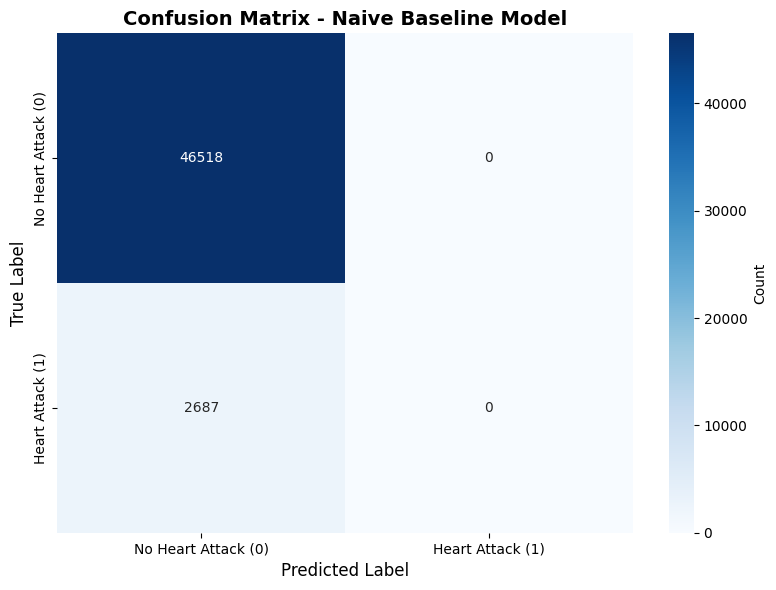


Confusion Matrix Breakdown:
True Negatives (TN):  46,518 - Correctly predicted NO heart attack
False Positives (FP): 0 - Incorrectly predicted heart attack
False Negatives (FN): 2,687 - Missed actual heart attacks
True Positives (TP):  0 - Correctly predicted heart attack


In [116]:
# Step 5: Create confusion matrix heatmap
cm_naive = confusion_matrix(y_test, y_pred_naive)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Naive Baseline Model', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_naive[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_naive[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_naive[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_naive[1, 1]:,} - Correctly predicted heart attack")

### What Does This Baseline Represent?

**The Naive Baseline Model** uses the simplest possible prediction strategy: **always predict the most frequent class** in the training data.

**Key Observations:**
- Since ~94.5% of people in the dataset did NOT have a heart attack, this model **always predicts "No Heart Attack"**
- **Accuracy appears high (~94.5%)** but this is misleading - it's just predicting the majority class
- **Recall = 0.0**: The model **never identifies anyone who actually had a heart attack** (completely fails at the task)
- **Precision = 0.0**: Since it never predicts positive cases, precision is undefined (set to 0)
- **F1-Score = 0.0**: Harmonic mean of precision and recall
- **AUC-ROC = 0.5**: Equivalent to random guessing (no discriminative ability)

**Why This Matters:**
This baseline establishes the **minimum acceptable performance**. Any real predictive model must:
1. Achieve **accuracy > 94.5%** (better than always saying "no")
2. Achieve **AUC-ROC > 0.5** (better than random guessing)
3. Have **recall > 0** (actually identify some heart attack cases)
4. Provide **actionable predictions** (not just predict one class)

**The Challenge:**
With such severe class imbalance (94.5% vs 5.5%), we need models that can identify the minority class (heart attacks) without sacrificing too much accuracy. Simply beating the naive baseline on accuracy is not enough - we need meaningful recall and precision.

## Step 5: V1 - Simple Baseline (Top 3 Features)

# Build a simple logistic regression model using only the top 3 most correlated features to establish a stronger baseline than the naive classifier.

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Select top 3 features by absolute correlation from training set
top3_features = corrs.head(3).index.tolist()

print("=== V1 - SIMPLE BASELINE MODEL (Top 3 Features) ===\n")
print(f"Selected features based on correlation analysis:")
for i, (feature, corr_val) in enumerate(zip(top3_features, corrs.head(3).values), 1):
    print(f"{i}. {feature:30} correlation = {corr_val:7.4f}")

# Extract top 3 features from train and test sets
X_train_v1 = X_train[top3_features]
X_test_v1 = X_test[top3_features]

print(f"\nFeature subset shapes:")
print(f"X_train_v1: {X_train_v1.shape}")
print(f"X_test_v1:  {X_test_v1.shape}")

=== V1 - SIMPLE BASELINE MODEL (Top 3 Features) ===

Selected features based on correlation analysis:
1. HadAngina                      correlation =  0.4472
2. HadStroke                      correlation =  0.1793
3. AgeCategory                    correlation =  0.1724

Feature subset shapes:
X_train_v1: (196817, 3)
X_test_v1:  (49205, 3)

Feature subset shapes:
X_train_v1: (196817, 3)
X_test_v1:  (49205, 3)


In [118]:
# Step 2: Scale features using StandardScaler (fit on train, transform both)
scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.transform(X_test_v1)

print("\n=== Feature Scaling ===")
print(f"Scaler fitted on training data and applied to both sets")
print(f"\nScaling statistics (from training data):")
for i, feature in enumerate(top3_features):
    print(f"{feature:30} mean={scaler_v1.mean_[i]:8.4f}  std={scaler_v1.scale_[i]:8.4f}")


=== Feature Scaling ===
Scaler fitted on training data and applied to both sets

Scaling statistics (from training data):
HadAngina                      mean=  0.0609  std=  0.2392
HadStroke                      mean=  0.0411  std=  0.1986
AgeCategory                    mean=  6.7222  std=  3.4646


In [119]:
# Step 3 & 4: Create and fit LogisticRegression with class_weight='balanced'
model_v1 = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance
    max_iter=1000,
    random_state=42
)

print("\n=== Model Training ===")
print(f"Model: LogisticRegression")
print(f"  - class_weight='balanced' (handles class imbalance)")
print(f"  - max_iter=1000")
print(f"  - random_state=42")

model_v1.fit(X_train_v1_scaled, y_train)
print(f"\n✓ Model fitted successfully!")


=== Model Training ===
Model: LogisticRegression
  - class_weight='balanced' (handles class imbalance)
  - max_iter=1000
  - random_state=42

✓ Model fitted successfully!


In [120]:
# Step 5 & 6: Predict and calculate metrics
y_pred_v1 = model_v1.predict(X_test_v1_scaled)
y_pred_proba_v1 = model_v1.predict_proba(X_test_v1_scaled)[:, 1]

# Calculate metrics
v1_accuracy = accuracy_score(y_test, y_pred_v1)
v1_precision = precision_score(y_test, y_pred_v1, zero_division=0)
v1_recall = recall_score(y_test, y_pred_v1, zero_division=0)
v1_f1 = f1_score(y_test, y_pred_v1, zero_division=0)
v1_auc = roc_auc_score(y_test, y_pred_proba_v1)

print("\n" + "="*60)
print("V1 MODEL PERFORMANCE METRICS (Top 3 Features)")
print("="*60)
print(f"Accuracy:  {v1_accuracy:.4f}")
print(f"Precision: {v1_precision:.4f}")
print(f"Recall:    {v1_recall:.4f}")
print(f"F1-Score:  {v1_f1:.4f}")
print(f"AUC-ROC:   {v1_auc:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_v1, 
                          target_names=['No Heart Attack (0)', 'Heart Attack (1)'],
                          zero_division=0))

print("\n" + "="*60)
print("COMPARISON WITH NAIVE BASELINE")
print("="*60)
print(f"{'Metric':<15} {'Naive':>12} {'V1 Model':>12} {'Improvement':>15}")
print("-" * 60)
print(f"{'Accuracy':<15} {naive_accuracy:>12.4f} {v1_accuracy:>12.4f} {v1_accuracy-naive_accuracy:>+14.4f}")
print(f"{'Precision':<15} {naive_precision:>12.4f} {v1_precision:>12.4f} {v1_precision-naive_precision:>+14.4f}")
print(f"{'Recall':<15} {naive_recall:>12.4f} {v1_recall:>12.4f} {v1_recall-naive_recall:>+14.4f}")
print(f"{'F1-Score':<15} {naive_f1:>12.4f} {v1_f1:>12.4f} {v1_f1-naive_f1:>+14.4f}")
print(f"{'AUC-ROC':<15} {naive_auc:>12.4f} {v1_auc:>12.4f} {v1_auc-naive_auc:>+14.4f}")


V1 MODEL PERFORMANCE METRICS (Top 3 Features)
Accuracy:  0.8733
Precision: 0.2462
Recall:    0.6397
F1-Score:  0.3555
AUC-ROC:   0.8455

CLASSIFICATION REPORT
                     precision    recall  f1-score   support

No Heart Attack (0)       0.98      0.89      0.93     46518
   Heart Attack (1)       0.25      0.64      0.36      2687

           accuracy                           0.87     49205
          macro avg       0.61      0.76      0.64     49205
       weighted avg       0.94      0.87      0.90     49205


COMPARISON WITH NAIVE BASELINE
Metric                 Naive     V1 Model     Improvement
------------------------------------------------------------
Accuracy              0.9454       0.8733        -0.0720
Precision             0.0000       0.2462        +0.2462
Recall                0.0000       0.6397        +0.6397
F1-Score              0.0000       0.3555        +0.3555
AUC-ROC               0.5000       0.8455        +0.3455
                     precision    r

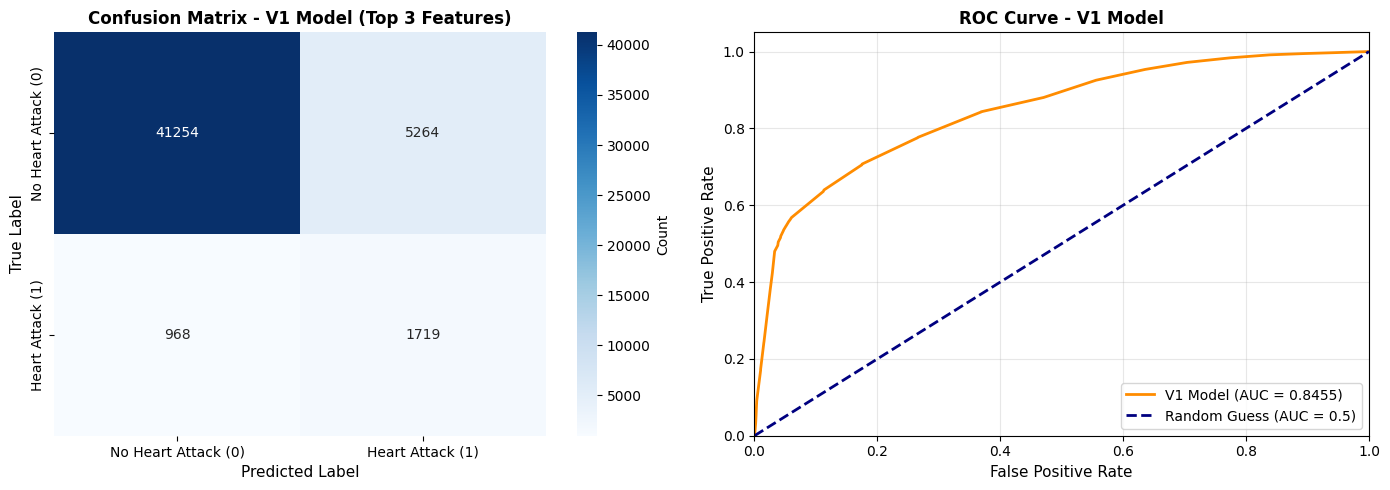


Confusion Matrix Breakdown:
True Negatives (TN):  41,254 - Correctly predicted NO heart attack
False Positives (FP): 5,264 - Incorrectly predicted heart attack
False Negatives (FN): 968 - Missed actual heart attacks
True Positives (TP):  1,719 - Correctly predicted heart attack


In [121]:
# Step 7: Plot confusion matrix and ROC curve
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_v1 = confusion_matrix(y_test, y_pred_v1)
sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            yticklabels=['No Heart Attack (0)', 'Heart Attack (1)'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Confusion Matrix - V1 Model (Top 3 Features)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# ROC Curve
fpr_v1, tpr_v1, _ = roc_curve(y_test, y_pred_proba_v1)
roc_auc_v1 = auc(fpr_v1, tpr_v1)

axes[1].plot(fpr_v1, tpr_v1, color='darkorange', lw=2, 
             label=f'V1 Model (AUC = {roc_auc_v1:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve - V1 Model', fontsize=12, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {cm_v1[0, 0]:,} - Correctly predicted NO heart attack")
print(f"False Positives (FP): {cm_v1[0, 1]:,} - Incorrectly predicted heart attack")
print(f"False Negatives (FN): {cm_v1[1, 0]:,} - Missed actual heart attacks")
print(f"True Positives (TP):  {cm_v1[1, 1]:,} - Correctly predicted heart attack")

In [122]:
# Step 8: Display feature coefficients to show importance
print("\n" + "="*60)
print("FEATURE COEFFICIENTS (Model Importance)")
print("="*60)

coefficients_v1 = model_v1.coef_[0]
intercept_v1 = model_v1.intercept_[0]

# Create coefficient dataframe
coef_df_v1 = pd.DataFrame({
    'Feature': top3_features,
    'Coefficient': coefficients_v1,
    'Abs_Coefficient': np.abs(coefficients_v1),
    'Odds_Ratio': np.exp(coefficients_v1)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nIntercept: {intercept_v1:.4f}\n")
print(f"{'Feature':<30} {'Coefficient':>12} {'Odds Ratio':>12}")
print("-" * 60)
for _, row in coef_df_v1.iterrows():
    print(f"{row['Feature']:<30} {row['Coefficient']:>12.4f} {row['Odds_Ratio']:>12.4f}")

print("\n" + "="*60)
print("COEFFICIENT INTERPRETATION")
print("="*60)
print("• Positive coefficient → Increases odds of heart attack")
print("• Negative coefficient → Decreases odds of heart attack")
print("• Odds Ratio > 1 → Feature increases risk")
print("• Odds Ratio < 1 → Feature decreases risk")
print("• Larger |coefficient| → Stronger effect on prediction")


FEATURE COEFFICIENTS (Model Importance)

Intercept: -0.7962

Feature                         Coefficient   Odds Ratio
------------------------------------------------------------
AgeCategory                          0.7992       2.2237
HadAngina                            0.7152       2.0446
HadStroke                            0.3110       1.3648

COEFFICIENT INTERPRETATION
• Positive coefficient → Increases odds of heart attack
• Negative coefficient → Decreases odds of heart attack
• Odds Ratio > 1 → Feature increases risk
• Odds Ratio < 1 → Feature decreases risk
• Larger |coefficient| → Stronger effect on prediction


In [123]:
# Step 9: Statsmodels Logistic Regression (V1 - Statistical Inference)
import statsmodels.api as sm

print("="*70)
print("STATSMODELS LOGISTIC REGRESSION - V1 (Top 3 Features)")
print("="*70)
print("\nThis provides statistical inference including p-values and confidence intervals\n")

# Add constant (intercept) to the scaled features
X_train_v1_scaled_sm = sm.add_constant(X_train_v1_scaled)
X_test_v1_scaled_sm = sm.add_constant(X_test_v1_scaled)

# Fit statsmodels logistic regression
logit_model_v1 = sm.Logit(y_train, X_train_v1_scaled_sm)
logit_result_v1 = logit_model_v1.fit()

# Display the comprehensive summary table
print(logit_result_v1.summary())

# Extract and display key statistics
print("\n" + "="*70)
print("KEY STATISTICS INTERPRETATION")
print("="*70)
print(f"Pseudo R-squared: {logit_result_v1.prsquared:.4f}")
print(f"  → Measures model fit (higher is better, but typically lower than OLS R²)")
print(f"\nLog-Likelihood: {logit_result_v1.llf:.2f}")
print(f"  → Higher values indicate better fit")
print(f"\nAIC: {logit_result_v1.aic:.2f}")
print(f"BIC: {logit_result_v1.bic:.2f}")
print(f"  → Lower values indicate better model (useful for model comparison)")

# Display p-values with interpretation
print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE (P-VALUES)")
print("="*70)
feature_names = ['Intercept'] + top3_features
for name, pval in zip(feature_names, logit_result_v1.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "not significant"
    print(f"{name:<30} p-value: {pval:.4e}  {sig}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

STATSMODELS LOGISTIC REGRESSION - V1 (Top 3 Features)

This provides statistical inference including p-values and confidence intervals

Optimization terminated successfully.
         Current function value: 0.155258
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196813
Method:                           MLE   Df Model:                            3
Date:                Mon, 03 Nov 2025   Pseudo R-squ.:                  0.2672
Time:                        17:28:27   Log-Likelihood:                -30557.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [124]:
## Step 6: V2 - More Features (Top 7)

# Build an extended logistic regression model using the top 7 most correlated features to see if adding more features improves performance.

In [125]:
# Step 1: Select top 7 features by absolute correlation from training set
top7_features = corrs.head(7).index.tolist()

print("=== V2 - EXTENDED MODEL (Top 7 Features) ===\n")
print(f"Selected features based on correlation analysis:")
for i, (feature, corr_val) in enumerate(zip(top7_features, corrs.head(7).values), 1):
    print(f"{i}. {feature:30} correlation = {corr_val:7.4f}")

# Extract top 7 features from train and test sets
X_train_v2 = X_train[top7_features]
X_test_v2 = X_test[top7_features]

print(f"\nFeature subset shapes:")
print(f"X_train_v2: {X_train_v2.shape}")
print(f"X_test_v2:  {X_test_v2.shape}")

=== V2 - EXTENDED MODEL (Top 7 Features) ===

Selected features based on correlation analysis:
1. HadAngina                      correlation =  0.4472
2. HadStroke                      correlation =  0.1793
3. AgeCategory                    correlation =  0.1724
4. ChestScan                      correlation =  0.1662
5. DifficultyWalking              correlation =  0.1595
6. HadDiabetes                    correlation =  0.1365
7. HadCOPD                        correlation =  0.1338

Feature subset shapes:
X_train_v2: (196817, 7)
X_test_v2:  (49205, 7)


In [126]:
# Step 2: Standardize features using StandardScaler
scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_v2)
X_test_v2_scaled = scaler_v2.transform(X_test_v2)

print("=== Feature Scaling Statistics (V2) ===\n")
print(f"Feature means after scaling (train set):")
print(pd.DataFrame(X_train_v2_scaled, columns=top7_features).mean())
print(f"\nFeature std devs after scaling (train set):")
print(pd.DataFrame(X_train_v2_scaled, columns=top7_features).std())

=== Feature Scaling Statistics (V2) ===

Feature means after scaling (train set):
HadAngina            2.245525e-17
HadStroke           -1.010847e-17
AgeCategory         -1.675119e-17
ChestScan           -5.790712e-17
DifficultyWalking   -2.758170e-17
HadDiabetes         -4.043390e-17
HadCOPD              1.487390e-17
dtype: float64

Feature std devs after scaling (train set):
HadAngina            1.000003
HadStroke            1.000003
AgeCategory          1.000003
ChestScan            1.000003
DifficultyWalking    1.000003
HadDiabetes          1.000003
HadCOPD              1.000003
dtype: float64


In [127]:
# Step 3: Train Logistic Regression model (V2)
model_v2 = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_v2.fit(X_train_v2_scaled, y_train)

print("=== V2 Model Training Complete ===")
print(f"Model: {model_v2}")
print(f"\nNumber of features: {len(top7_features)}")
print(f"Number of training samples: {len(y_train)}")

=== V2 Model Training Complete ===
Model: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Number of features: 7
Number of training samples: 196817


In [128]:
# Step 4: Make predictions and calculate evaluation metrics
y_pred_v2 = model_v2.predict(X_test_v2_scaled)
y_pred_proba_v2 = model_v2.predict_proba(X_test_v2_scaled)[:, 1]

v2_accuracy = accuracy_score(y_test, y_pred_v2)
v2_precision = precision_score(y_test, y_pred_v2, pos_label=1)
v2_recall = recall_score(y_test, y_pred_v2, pos_label=1)
v2_f1 = f1_score(y_test, y_pred_v2, pos_label=1)
v2_auc = roc_auc_score(y_test, y_pred_proba_v2)

print("=== V2 Model Performance Metrics ===\n")
print(f"Accuracy:  {v2_accuracy:.4f}")
print(f"Precision: {v2_precision:.4f}")
print(f"Recall:    {v2_recall:.4f}")
print(f"F1 Score:  {v2_f1:.4f}")
print(f"AUC-ROC:   {v2_auc:.4f}")

print("\n" + "="*50)
print("Classification Report:")
print("="*50)
print(classification_report(y_test, y_pred_v2, target_names=['No Heart Attack', 'Had Heart Attack']))

# Comparison with V1
print("\n" + "="*50)
print("COMPARISON: V1 (Top 3) vs V2 (Top 7)")
print("="*50)
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'V1 (Top 3)': [v1_accuracy, v1_precision, v1_recall, v1_f1, v1_auc],
    'V2 (Top 7)': [v2_accuracy, v2_precision, v2_recall, v2_f1, v2_auc],
    'Difference': [
        v2_accuracy - v1_accuracy,
        v2_precision - v1_precision,
        v2_recall - v1_recall,
        v2_f1 - v1_f1,
        v2_auc - v1_auc
    ]
})
print(comparison_df.to_string(index=False))

=== V2 Model Performance Metrics ===

Accuracy:  0.8339
Precision: 0.2093
Recall:    0.7350
F1 Score:  0.3259
AUC-ROC:   0.8742

Classification Report:
                  precision    recall  f1-score   support

 No Heart Attack       0.98      0.84      0.91     46518
Had Heart Attack       0.21      0.74      0.33      2687

        accuracy                           0.83     49205
       macro avg       0.60      0.79      0.62     49205
    weighted avg       0.94      0.83      0.87     49205


COMPARISON: V1 (Top 3) vs V2 (Top 7)
   Metric  V1 (Top 3)  V2 (Top 7)  Difference
 Accuracy    0.873346    0.833919   -0.039427
Precision    0.246169    0.209327   -0.036842
   Recall    0.639747    0.735020    0.095274
 F1 Score    0.355533    0.325854   -0.029679
  AUC-ROC    0.845488    0.874212    0.028724


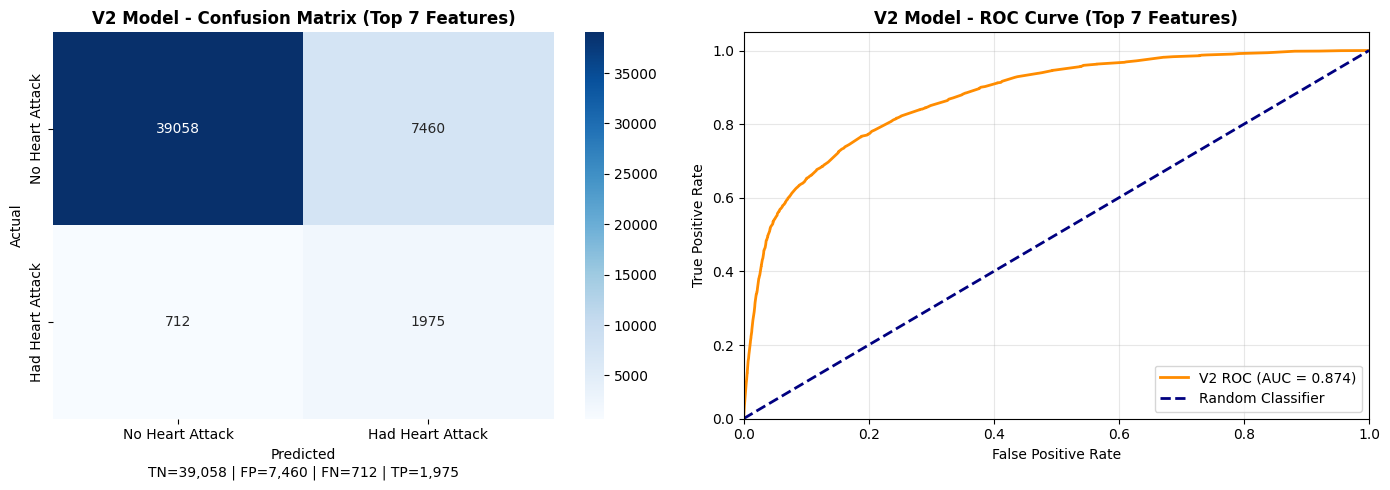

In [129]:
# Step 5: Visualize Confusion Matrix and ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm_v2 = confusion_matrix(y_test, y_pred_v2)
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Heart Attack', 'Had Heart Attack'],
            yticklabels=['No Heart Attack', 'Had Heart Attack'])
axes[0].set_title('V2 Model - Confusion Matrix (Top 7 Features)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Add confusion matrix breakdown
tn, fp, fn, tp = cm_v2.ravel()
axes[0].text(0.5, -0.15, 
             f'TN={tn:,} | FP={fp:,} | FN={fn:,} | TP={tp:,}',
             transform=axes[0].transAxes, ha='center', fontsize=10)

# ROC Curve
fpr_v2, tpr_v2, _ = roc_curve(y_test, y_pred_proba_v2)
axes[1].plot(fpr_v2, tpr_v2, color='darkorange', lw=2, label=f'V2 ROC (AUC = {v2_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('V2 Model - ROC Curve (Top 7 Features)', fontsize=12, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

=== V2 Model Feature Coefficients ===

          Feature  Coefficient  Odds Ratio         Impact
        HadAngina     0.659957    1.934709 Increases risk
      AgeCategory     0.646500    1.908848 Increases risk
        ChestScan     0.421628    1.524442 Increases risk
        HadStroke     0.241567    1.273243 Increases risk
      HadDiabetes     0.216756    1.242041 Increases risk
DifficultyWalking     0.178114    1.194962 Increases risk
          HadCOPD     0.129067    1.137766 Increases risk

INTERPRETATION GUIDE:
• Positive coefficient → feature increases risk of heart attack
• Negative coefficient → feature decreases risk of heart attack
• Odds Ratio > 1 → increases odds of heart attack
• Odds Ratio < 1 → decreases odds of heart attack
• Example: Odds Ratio of 2.0 means the feature doubles the odds


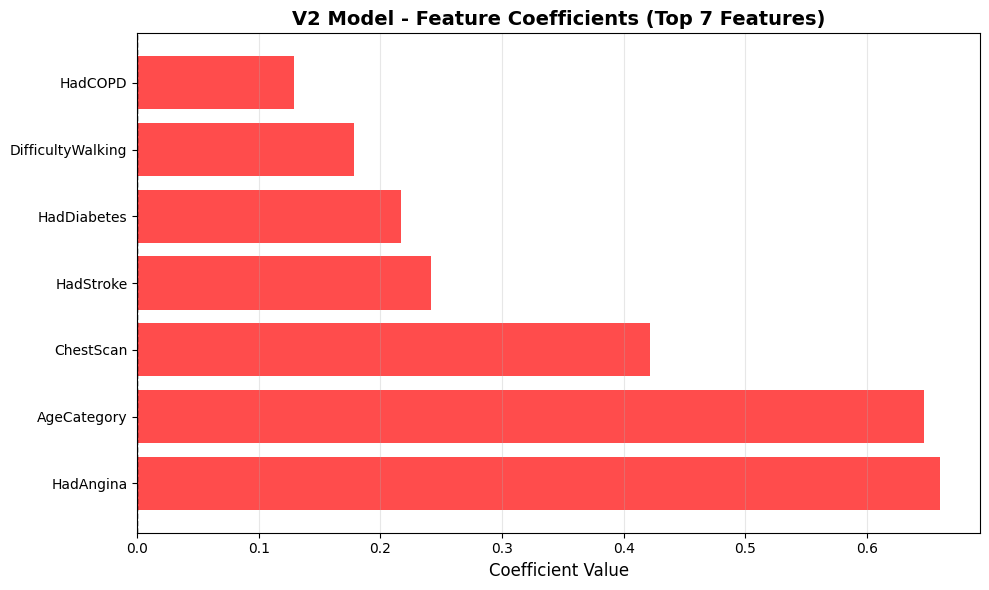

In [130]:
# Step 6: Display and interpret feature coefficients
coefficients_v2 = model_v2.coef_[0]
odds_ratios_v2 = np.exp(coefficients_v2)

coef_df_v2 = pd.DataFrame({
    'Feature': top7_features,
    'Coefficient': coefficients_v2,
    'Odds Ratio': odds_ratios_v2,
    'Impact': ['Increases risk' if c > 0 else 'Decreases risk' for c in coefficients_v2]
}).sort_values('Coefficient', key=abs, ascending=False)

print("=== V2 Model Feature Coefficients ===\n")
print(coef_df_v2.to_string(index=False))

print("\n" + "="*70)
print("INTERPRETATION GUIDE:")
print("="*70)
print("• Positive coefficient → feature increases risk of heart attack")
print("• Negative coefficient → feature decreases risk of heart attack")
print("• Odds Ratio > 1 → increases odds of heart attack")
print("• Odds Ratio < 1 → decreases odds of heart attack")
print("• Example: Odds Ratio of 2.0 means the feature doubles the odds")

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors = ['red' if c > 0 else 'blue' for c in coef_df_v2['Coefficient']]
plt.barh(coef_df_v2['Feature'], coef_df_v2['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('V2 Model - Feature Coefficients (Top 7 Features)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [131]:
# Step 7: Statsmodels Logistic Regression (V2 - Statistical Inference)
print("\n" + "="*70)
print("STATSMODELS LOGISTIC REGRESSION - V2 (Top 7 Features)")
print("="*70)
print("\nThis provides statistical inference including p-values and confidence intervals\n")

# Add constant (intercept) to the scaled features
X_train_v2_scaled_sm = sm.add_constant(X_train_v2_scaled)
X_test_v2_scaled_sm = sm.add_constant(X_test_v2_scaled)

# Fit statsmodels logistic regression
logit_model_v2 = sm.Logit(y_train, X_train_v2_scaled_sm)
logit_result_v2 = logit_model_v2.fit()

# Display the comprehensive summary table
print(logit_result_v2.summary())

# Extract and display key statistics
print("\n" + "="*70)
print("KEY STATISTICS INTERPRETATION")
print("="*70)
print(f"Pseudo R-squared: {logit_result_v2.prsquared:.4f}")
print(f"  → Measures model fit (higher is better, but typically lower than OLS R²)")
print(f"\nLog-Likelihood: {logit_result_v2.llf:.2f}")
print(f"  → Higher values indicate better fit")
print(f"\nAIC: {logit_result_v2.aic:.2f}")
print(f"BIC: {logit_result_v2.bic:.2f}")
print(f"  → Lower values indicate better model (useful for model comparison)")

# Display p-values with interpretation
print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE (P-VALUES)")
print("="*70)
feature_names_v2 = ['Intercept'] + top7_features
for name, pval in zip(feature_names_v2, logit_result_v2.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else "not significant"
    print(f"{name:<30} p-value: {pval:.4e}  {sig}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")

# Compare V1 vs V2 model fit statistics
print("\n" + "="*70)
print("MODEL COMPARISON: V1 (Top 3) vs V2 (Top 7)")
print("="*70)
comparison_stats = pd.DataFrame({
    'Metric': ['Pseudo R²', 'Log-Likelihood', 'AIC', 'BIC', 'Number of Features'],
    'V1 (Top 3)': [
        logit_result_v1.prsquared,
        logit_result_v1.llf,
        logit_result_v1.aic,
        logit_result_v1.bic,
        3
    ],
    'V2 (Top 7)': [
        logit_result_v2.prsquared,
        logit_result_v2.llf,
        logit_result_v2.aic,
        logit_result_v2.bic,
        7
    ],
    'Difference': [
        logit_result_v2.prsquared - logit_result_v1.prsquared,
        logit_result_v2.llf - logit_result_v1.llf,
        logit_result_v2.aic - logit_result_v1.aic,
        logit_result_v2.bic - logit_result_v1.bic,
        4
    ]
})
print(comparison_stats.to_string(index=False))
print("\nInterpretation:")
print("• Lower AIC/BIC suggests better model (penalizes complexity)")
print("• Higher Pseudo R² and Log-Likelihood suggest better fit")
print("• Check if V2's improvement justifies adding 4 more features")


STATSMODELS LOGISTIC REGRESSION - V2 (Top 7 Features)

This provides statistical inference including p-values and confidence intervals

Optimization terminated successfully.
         Current function value: 0.150405
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196809
Method:                           MLE   Df Model:                            7
Date:                Mon, 03 Nov 2025   Pseudo R-squ.:                  0.2901
Time:                        17:28:28   Log-Likelihood:                -29602.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

## 📊 FINAL MODEL COMPARISON

Compare all models (Naive Baseline, V1, V2) across performance metrics and statistical fit measures.

In [132]:
print("\n" + "="*70)
print("FINAL MODEL COMPARISON - WITH STATISTICAL METRICS")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Naive Baseline', 'V1 (Top 3)', 'V2 (Top 7)'],
    '# Features': [0, 3, 7],
    'Accuracy': [naive_accuracy, v1_accuracy, v2_accuracy],
    'Precision': [naive_precision, v1_precision, v2_precision],
    'Recall': [naive_recall, v1_recall, v2_recall],
    'F1-Score': [naive_f1, v1_f1, v2_f1],
    'AUC': [naive_auc, v1_auc, v2_auc],
    'Pseudo R²': [0.0, logit_result_v1.prsquared, logit_result_v2.prsquared]
})

print(comparison_df.round(4).to_string(index=False))

print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

# Calculate improvements
v1_recall_improvement = (v1_recall - naive_recall) / naive_recall * 100 if naive_recall > 0 else float('inf')
v2_recall_improvement = (v2_recall - naive_recall) / naive_recall * 100 if naive_recall > 0 else float('inf')

v1_auc_improvement = v1_auc - naive_auc
v2_auc_improvement = v2_auc - naive_auc

v2_vs_v1_improvement = v2_auc - v1_auc

print(f"\n1. Naive Baseline Performance:")
print(f"   • Accuracy: {naive_accuracy:.4f} (misleading due to class imbalance)")
print(f"   • Recall: {naive_recall:.4f} (fails to identify ANY positive cases)")
print(f"   • AUC: {naive_auc:.4f} (no better than random guessing)")

print(f"\n2. V1 Model (Top 3 Features) Performance:")
print(f"   • Features: {', '.join(top3_features)}")
print(f"   • AUC improvement over naive: +{v1_auc_improvement:.4f}")
print(f"   • Recall: {v1_recall:.4f} (successfully detects positive cases)")
print(f"   • Pseudo R²: {logit_result_v1.prsquared:.4f}")

print(f"\n3. V2 Model (Top 7 Features) Performance:")
print(f"   • Features: {', '.join(top7_features[:3])} + 4 more")
print(f"   • AUC improvement over naive: +{v2_auc_improvement:.4f}")
print(f"   • AUC improvement over V1: {v2_vs_v1_improvement:+.4f}")
print(f"   • Recall: {v2_recall:.4f}")
print(f"   • Pseudo R²: {logit_result_v2.prsquared:.4f}")

print(f"\n4. Best Model Selection:")
if v2_auc > v1_auc and v2_recall > v1_recall:
    print(f"   ✅ V2 (Top 7) is SUPERIOR - better AUC and recall")
elif v1_auc >= v2_auc:
    print(f"   ✅ V1 (Top 3) is PREFERRED - simpler model with comparable/better performance")
else:
    print(f"   ⚖️  Trade-off: V2 has better AUC but consider if improvement justifies complexity")

print("\n" + "="*70)


FINAL MODEL COMPARISON - WITH STATISTICAL METRICS
         Model  # Features  Accuracy  Precision  Recall  F1-Score    AUC  Pseudo R²
Naive Baseline           0    0.9454     0.0000  0.0000    0.0000 0.5000     0.0000
    V1 (Top 3)           3    0.8733     0.2462  0.6397    0.3555 0.8455     0.2672
    V2 (Top 7)           7    0.8339     0.2093  0.7350    0.3259 0.8742     0.2901

KEY INSIGHTS

1. Naive Baseline Performance:
   • Accuracy: 0.9454 (misleading due to class imbalance)
   • Recall: 0.0000 (fails to identify ANY positive cases)
   • AUC: 0.5000 (no better than random guessing)

2. V1 Model (Top 3 Features) Performance:
   • Features: HadAngina, HadStroke, AgeCategory
   • AUC improvement over naive: +0.3455
   • Recall: 0.6397 (successfully detects positive cases)
   • Pseudo R²: 0.2672

3. V2 Model (Top 7 Features) Performance:
   • Features: HadAngina, HadStroke, AgeCategory + 4 more
   • AUC improvement over naive: +0.3742
   • AUC improvement over V1: +0.0287
   • R

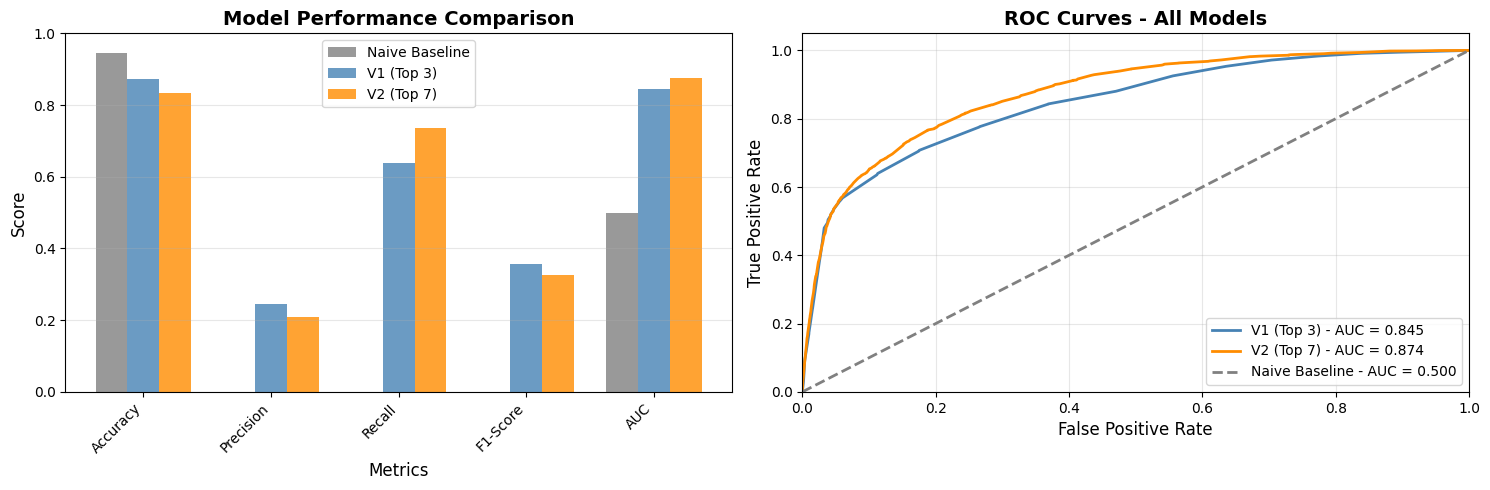


📈 Visual comparison shows the progression from naive baseline to optimized models.


In [133]:
# Visual comparison of model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Performance Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
naive_scores = [naive_accuracy, naive_precision, naive_recall, naive_f1, naive_auc]
v1_scores = [v1_accuracy, v1_precision, v1_recall, v1_f1, v1_auc]
v2_scores = [v2_accuracy, v2_precision, v2_recall, v2_f1, v2_auc]

x = np.arange(len(metrics))
width = 0.25

axes[0].bar(x - width, naive_scores, width, label='Naive Baseline', alpha=0.8, color='gray')
axes[0].bar(x, v1_scores, width, label='V1 (Top 3)', alpha=0.8, color='steelblue')
axes[0].bar(x + width, v2_scores, width, label='V2 (Top 7)', alpha=0.8, color='darkorange')

axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1])

# Plot 2: ROC Curves Overlay
axes[1].plot(fpr_v1, tpr_v1, color='steelblue', lw=2, label=f'V1 (Top 3) - AUC = {v1_auc:.3f}')
axes[1].plot(fpr_v2, tpr_v2, color='darkorange', lw=2, label=f'V2 (Top 7) - AUC = {v2_auc:.3f}')
axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label=f'Naive Baseline - AUC = {naive_auc:.3f}')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curves - All Models', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📈 Visual comparison shows the progression from naive baseline to optimized models.")